# Explore here

In [1]:
# Librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Se importa el csv como un DataFrame

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv',sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Problema: identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo

In [3]:
# Clasificación de variables y valores faltantes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Verificación de filas duplicadas

df.duplicated().sum()

np.int64(12)

In [5]:
# Eliminación de filas duplicadas

df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

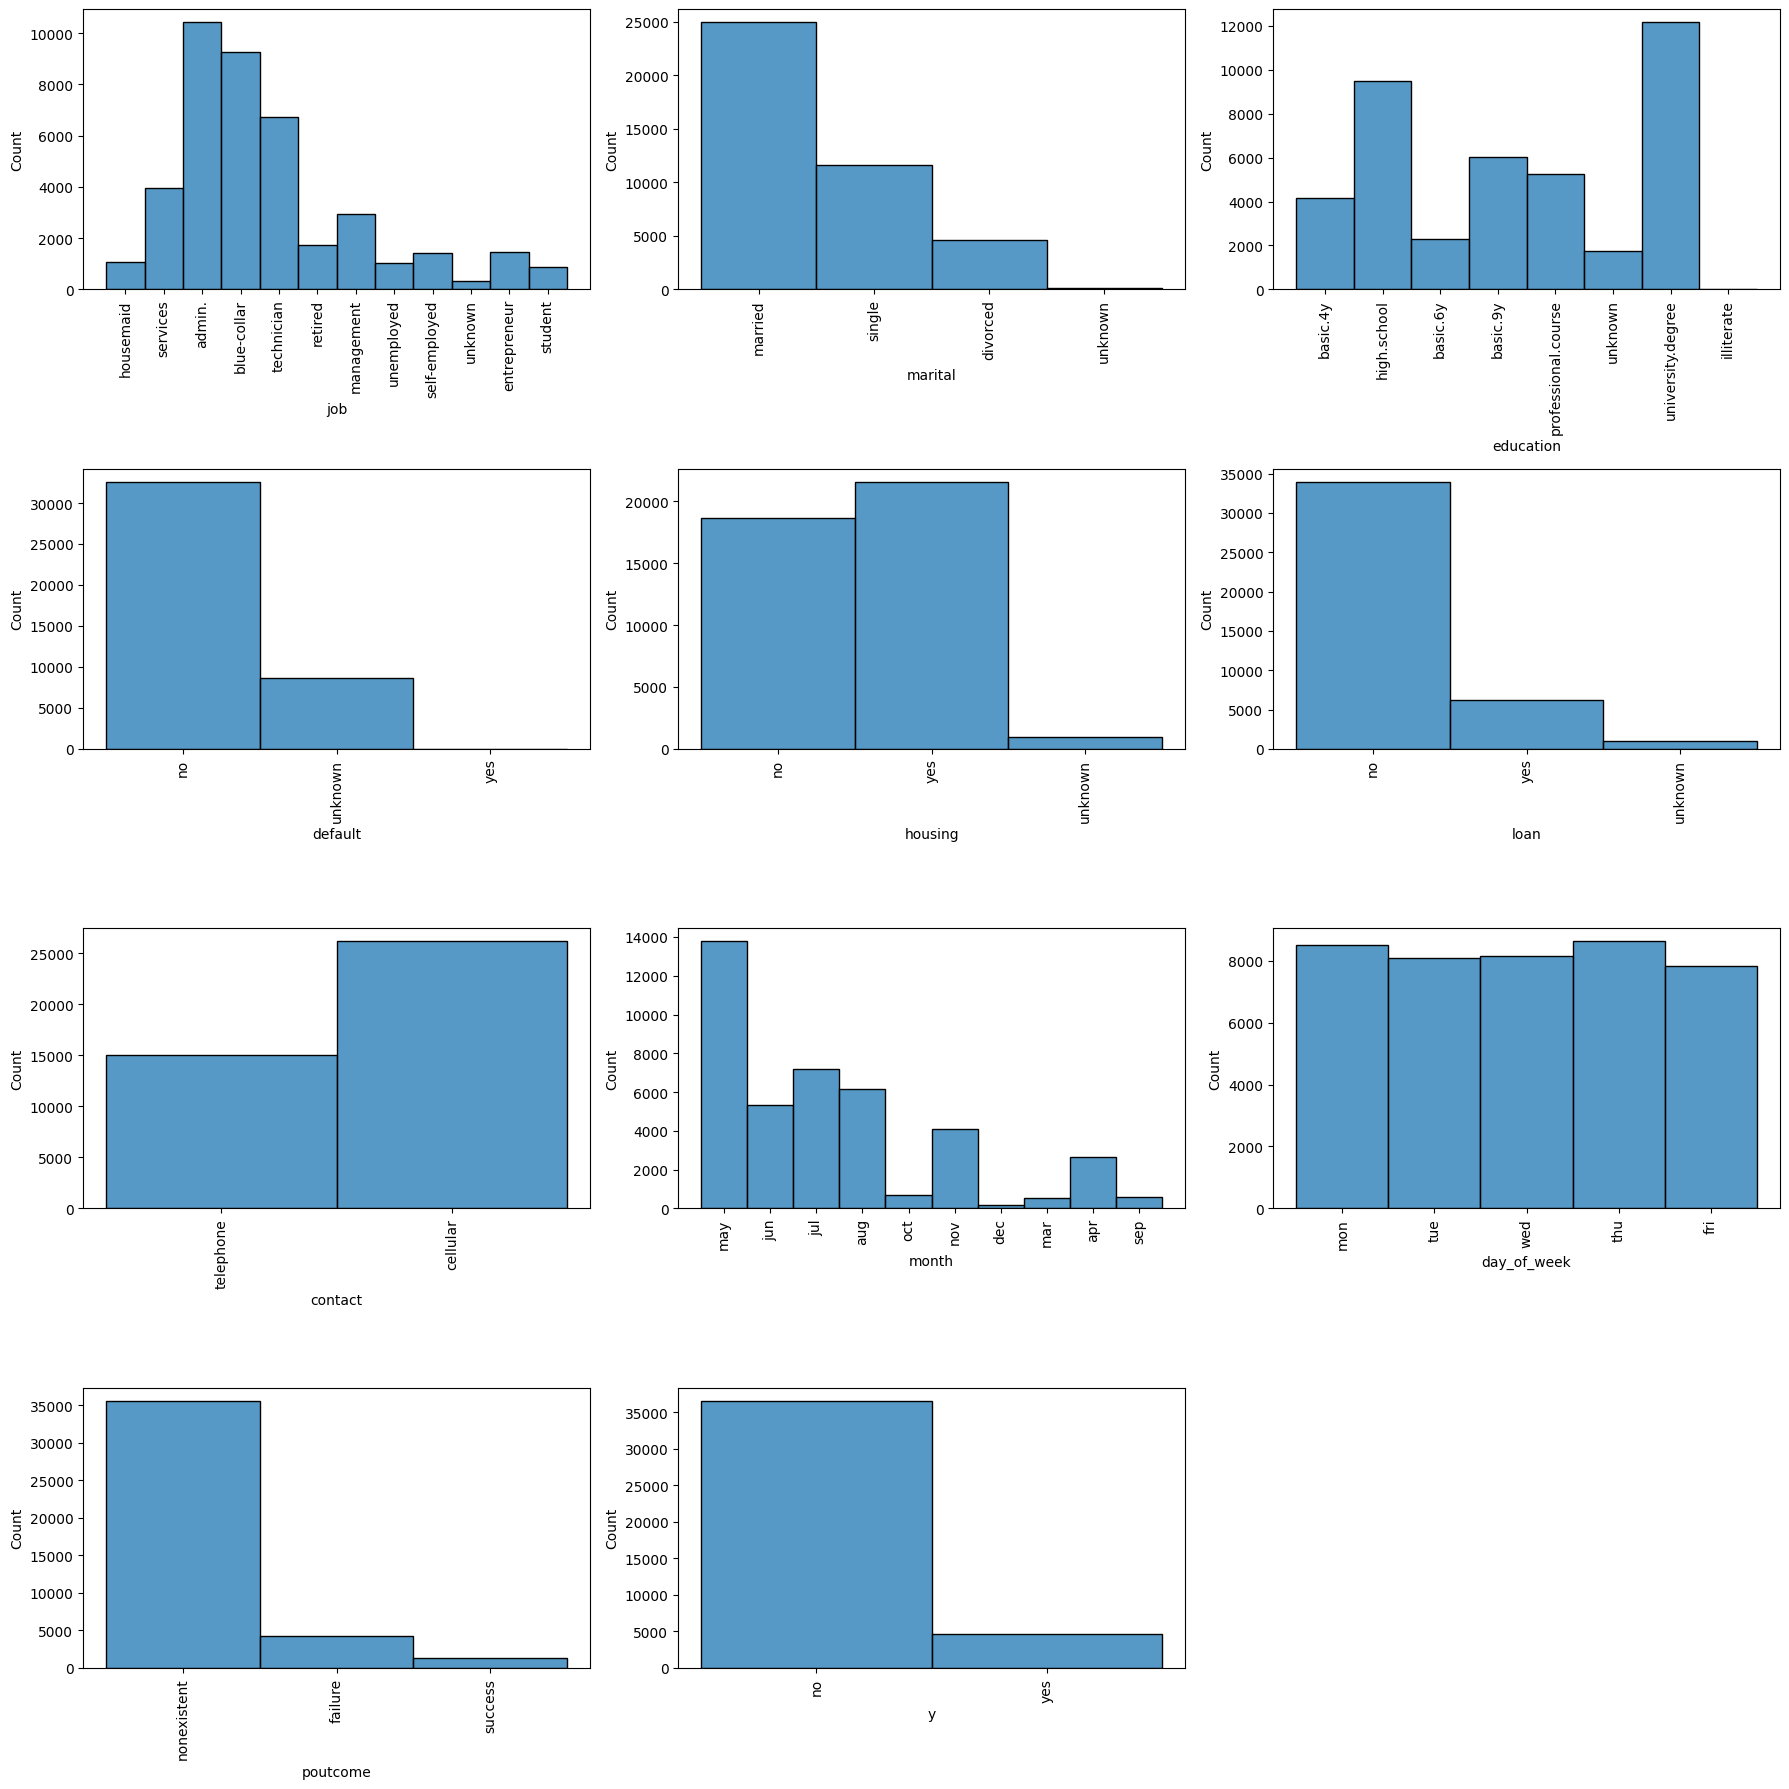

In [6]:
# Análisis Univariante 
    #Categorico

fig, axis = plt.subplots(4,3,figsize=(18,18))

#histogramas
sns.histplot(ax= axis[0,0],data=df,x='job')
sns.histplot(ax= axis[0,1],data=df,x='marital')
sns.histplot(ax= axis[0,2],data=df,x='education')
sns.histplot(ax= axis[1,0],data=df,x='default')
sns.histplot(ax= axis[1,1],data=df,x='housing')
sns.histplot(ax= axis[1,2],data=df,x='loan')
sns.histplot(ax= axis[2,0],data=df,x='contact')
sns.histplot(ax= axis[2,1],data=df,x='month')
sns.histplot(ax= axis[2,2],data=df,x='day_of_week')
sns.histplot(ax= axis[3,0],data=df,x='poutcome')
sns.histplot(ax= axis[3,1],data=df,x='y')

for ax in axis.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

fig.delaxes(axis[3,2])
plt.tight_layout()
plt.show()




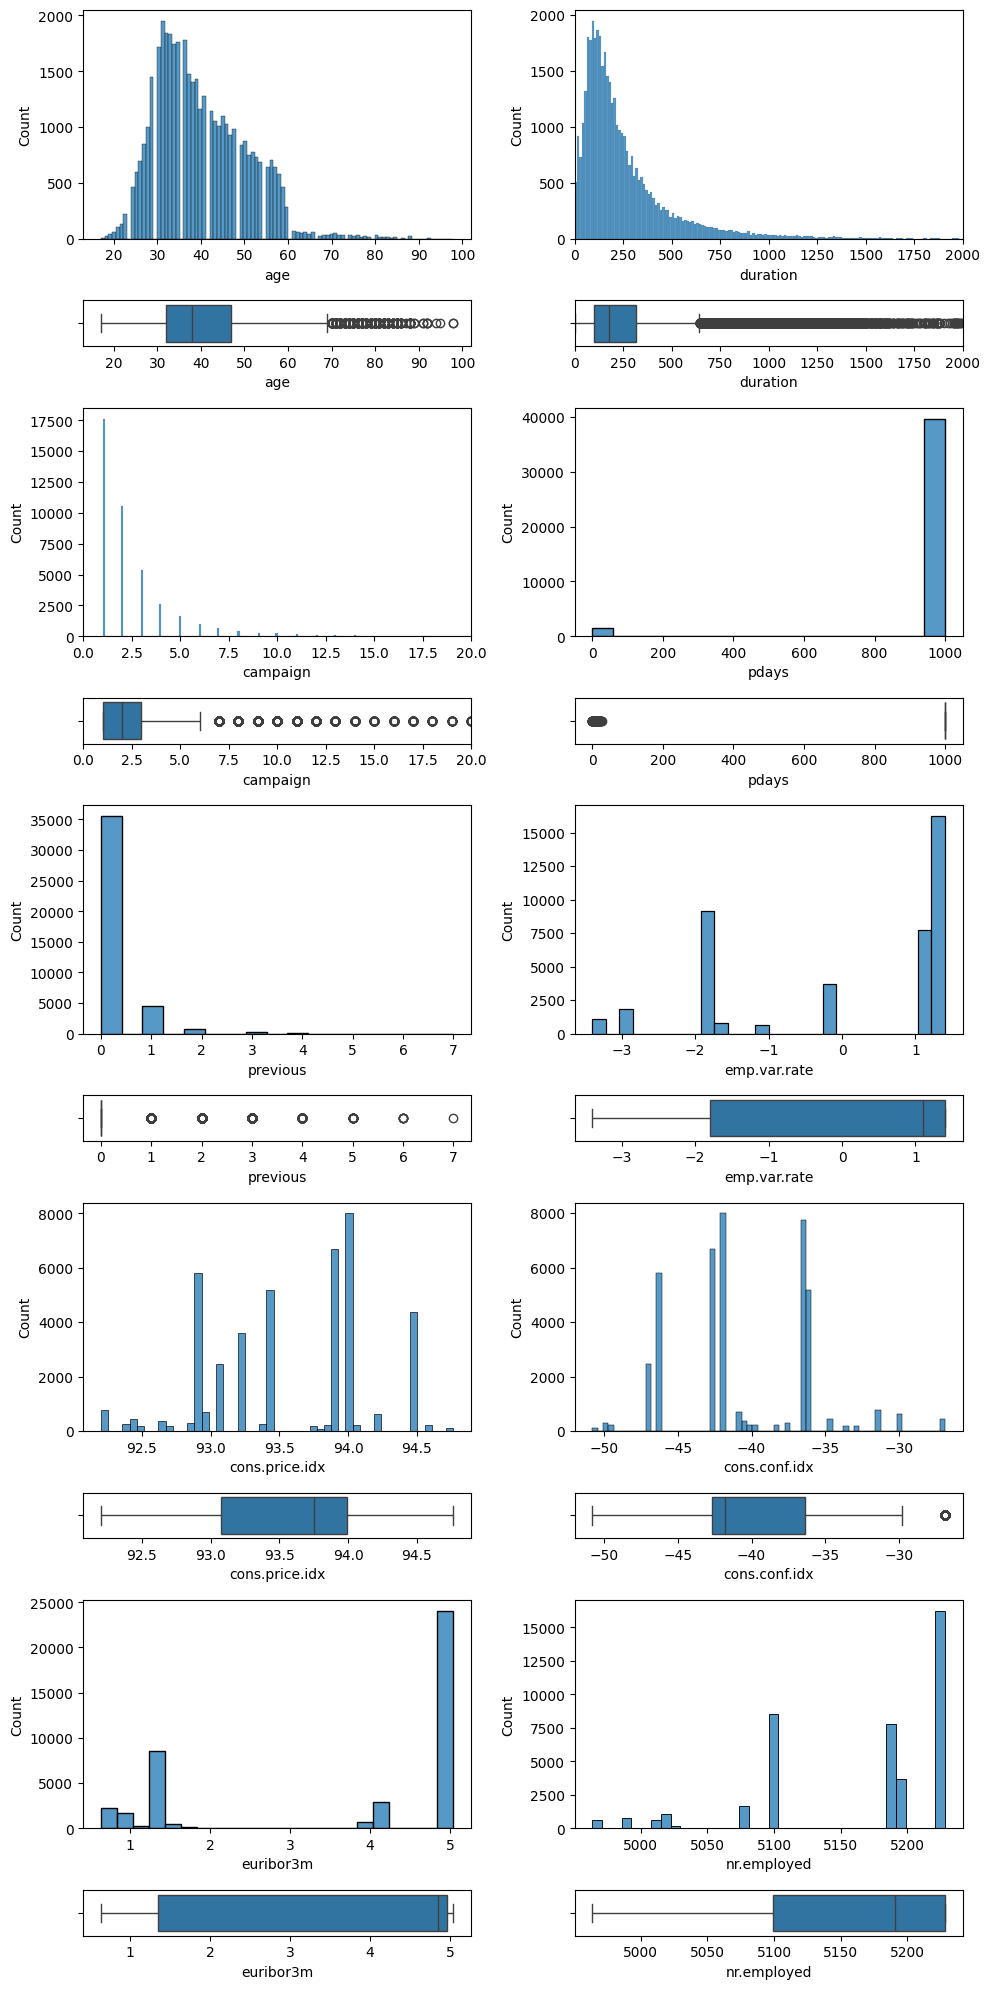

In [7]:
    # Númerico

fig, axis = plt.subplots(10,2,figsize=(10,20),gridspec_kw={"height_ratios":[5,1,5,1,5,1,5,1,5,1]}) 

sns.histplot(ax=axis[0,0],data=df,x='age')
sns.boxplot(ax=axis[1,0],data=df,x='age')

sns.histplot(ax=axis[0,1],data=df,x='duration').set_xlim(0,2000)
sns.boxplot(ax=axis[1,1],data=df,x='duration').set_xlim(0,2000)

sns.histplot(ax=axis[2,0],data=df,x='campaign').set_xlim(0,20)
sns.boxplot(ax=axis[3,0],data=df,x='campaign').set_xlim(0,20)

sns.histplot(ax=axis[2,1],data=df,x='pdays')
sns.boxplot(ax=axis[3,1],data=df,x='pdays')

sns.histplot(ax=axis[4,0],data=df,x='previous')
sns.boxplot(ax=axis[5,0],data=df,x='previous')

sns.histplot(ax=axis[4,1],data=df,x='emp.var.rate')
sns.boxplot(ax=axis[5,1],data=df,x='emp.var.rate')

sns.histplot(ax=axis[6,0],data=df,x='cons.price.idx')
sns.boxplot(ax=axis[7,0],data=df,x='cons.price.idx')

sns.histplot(ax=axis[6,1],data=df,x='cons.conf.idx')
sns.boxplot(ax=axis[7,1],data=df,x='cons.conf.idx')

sns.histplot(ax=axis[8,0],data=df,x='euribor3m')
sns.boxplot(ax=axis[9,0],data=df,x='euribor3m')

sns.histplot(ax=axis[8,1],data=df,x='nr.employed')
sns.boxplot(ax=axis[9,1],data=df,x='nr.employed')



plt.tight_layout()
plt.show()
            

Nota: Variable 'pdays' (número de días desde la última campaña hasta que fue contactado), solo contiene los valores 0 y 999. Lo cúal puede deberse a un error de la recoleccíon de los datos. Se decide eliminar ya que no puede aportar nada a la predicción

In [8]:
# Eliminación variable 'pdays'

df = df.drop('pdays',axis=1)

In [9]:
# Factorización de variable objetivo

df['y'] = pd.factorize(df['y'])[0]
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

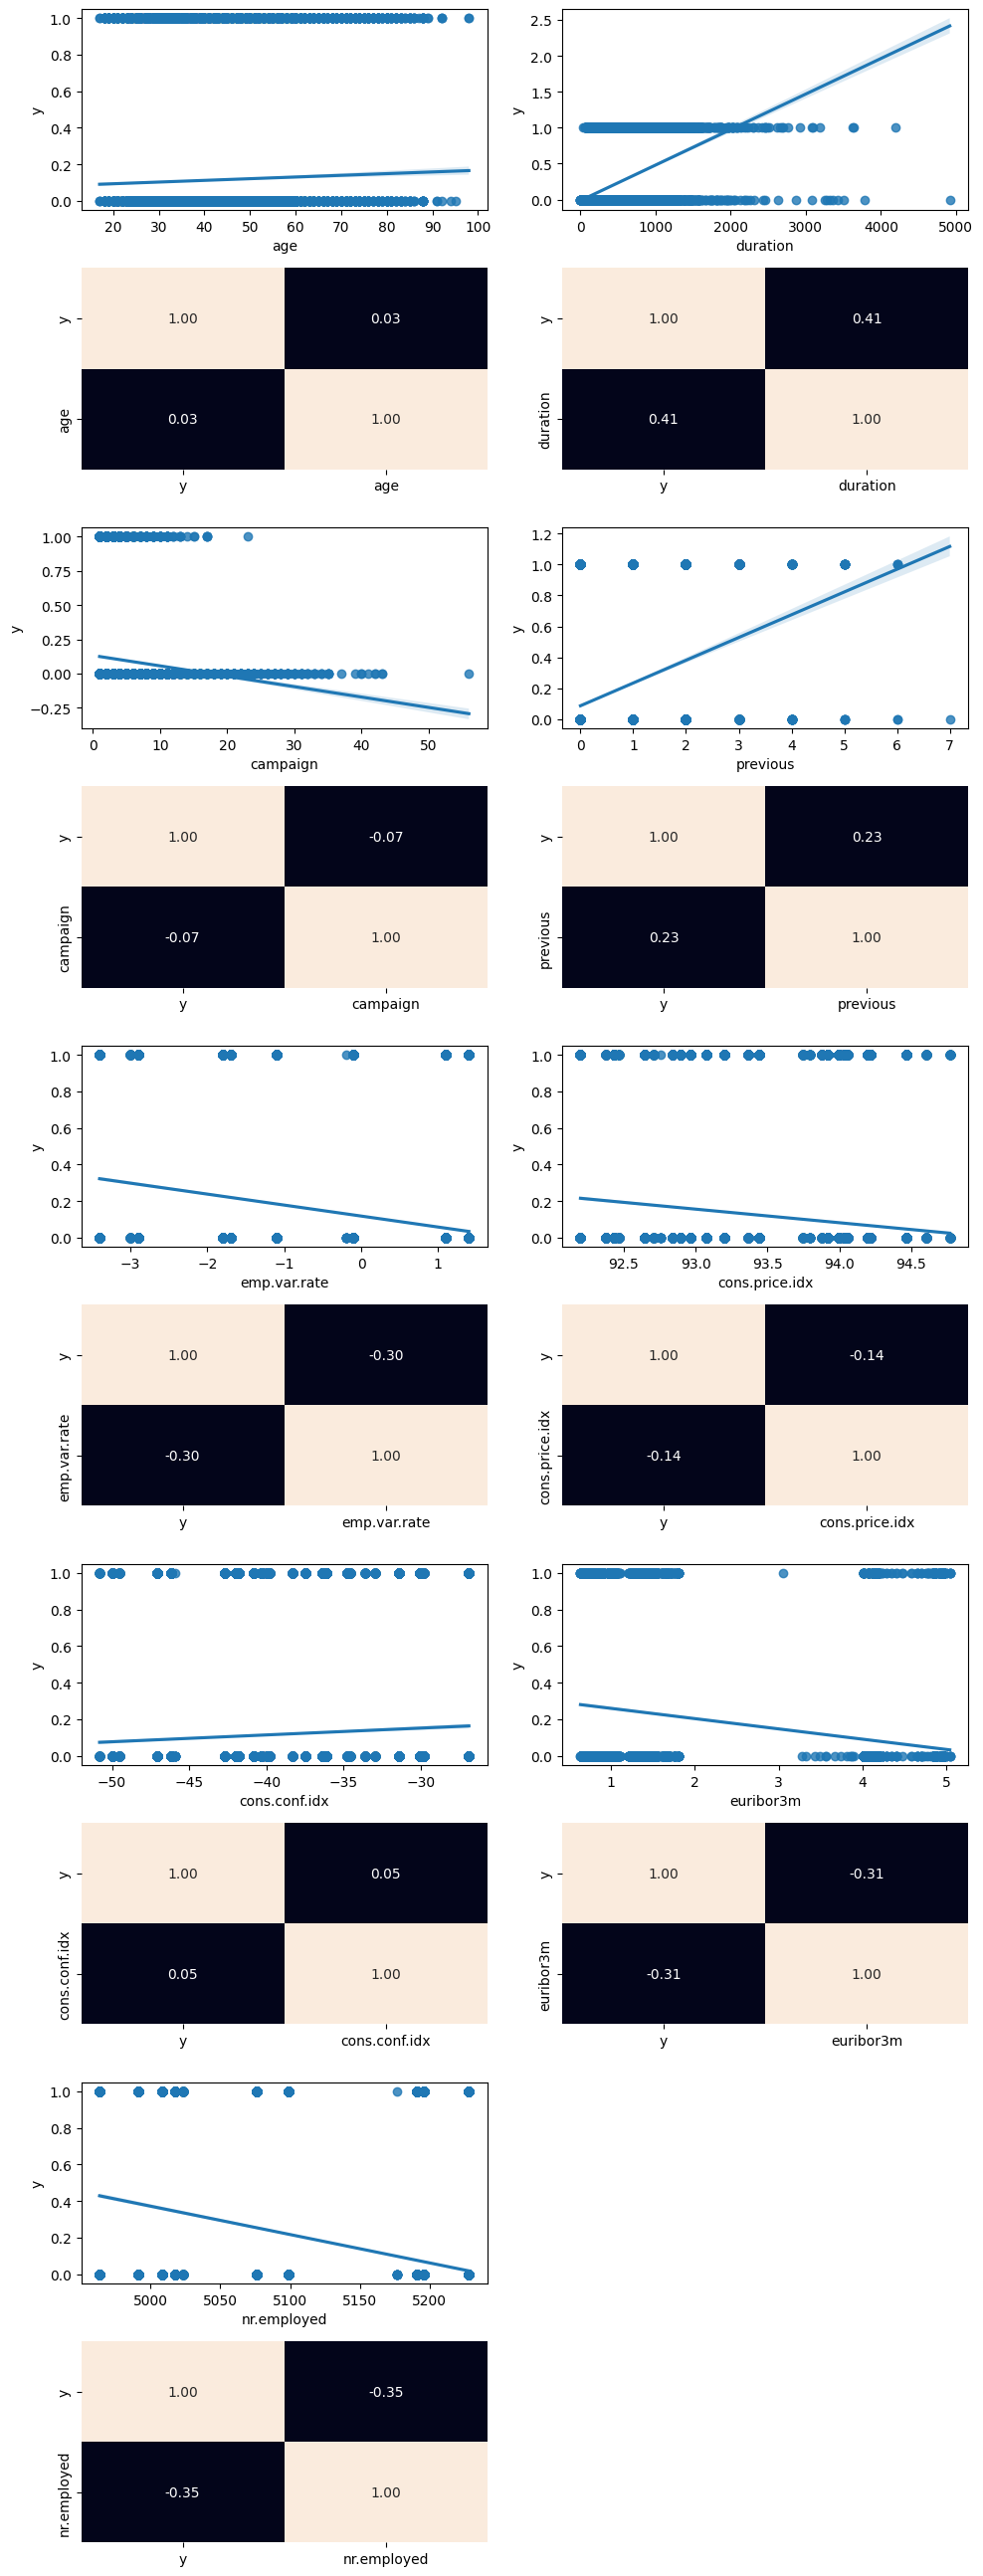

In [10]:
# Análisis Multivariante
    # Númerico - númerico

fig, axis = plt.subplots(10,2,figsize=(10,26))

sns.regplot(ax=axis[0,0], data=df, x="age", y="y")
sns.heatmap(df[['y','age']].corr(),annot=True,fmt='.2f',ax=axis[1,0],cbar=False)

sns.regplot(ax=axis[0,1], data=df, x="duration", y="y")
sns.heatmap(df[['y','duration']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False)

sns.regplot(ax=axis[2,0], data=df, x="campaign", y="y")
sns.heatmap(df[['y','campaign']].corr(),annot=True,fmt='.2f',ax=axis[3,0],cbar=False)

sns.regplot(ax=axis[2,1], data=df, x="previous", y="y")
sns.heatmap(df[['y','previous']].corr(),annot=True,fmt='.2f',ax=axis[3,1],cbar=False)

sns.regplot(ax=axis[4,0], data=df, x="emp.var.rate", y="y")
sns.heatmap(df[['y','emp.var.rate']].corr(),annot=True,fmt='.2f',ax=axis[5,0],cbar=False)

sns.regplot(ax=axis[4,1], data=df, x="cons.price.idx", y="y")
sns.heatmap(df[['y','cons.price.idx']].corr(),annot=True,fmt='.2f',ax=axis[5,1],cbar=False)

sns.regplot(ax=axis[6,0], data=df, x="cons.conf.idx", y="y")
sns.heatmap(df[['y','cons.conf.idx']].corr(),annot=True,fmt='.2f',ax=axis[7,0],cbar=False)

sns.regplot(ax=axis[6,1], data=df, x="euribor3m", y="y")
sns.heatmap(df[['y','euribor3m']].corr(),annot=True,fmt='.2f',ax=axis[7,1],cbar=False)

sns.regplot(ax=axis[8,0], data=df, x="nr.employed", y="y")
sns.heatmap(df[['y','nr.employed']].corr(),annot=True,fmt='.2f',ax=axis[9,0],cbar=False)

fig.delaxes(axis[8,1])
fig.delaxes(axis[9,1])
plt.tight_layout()
plt.show()

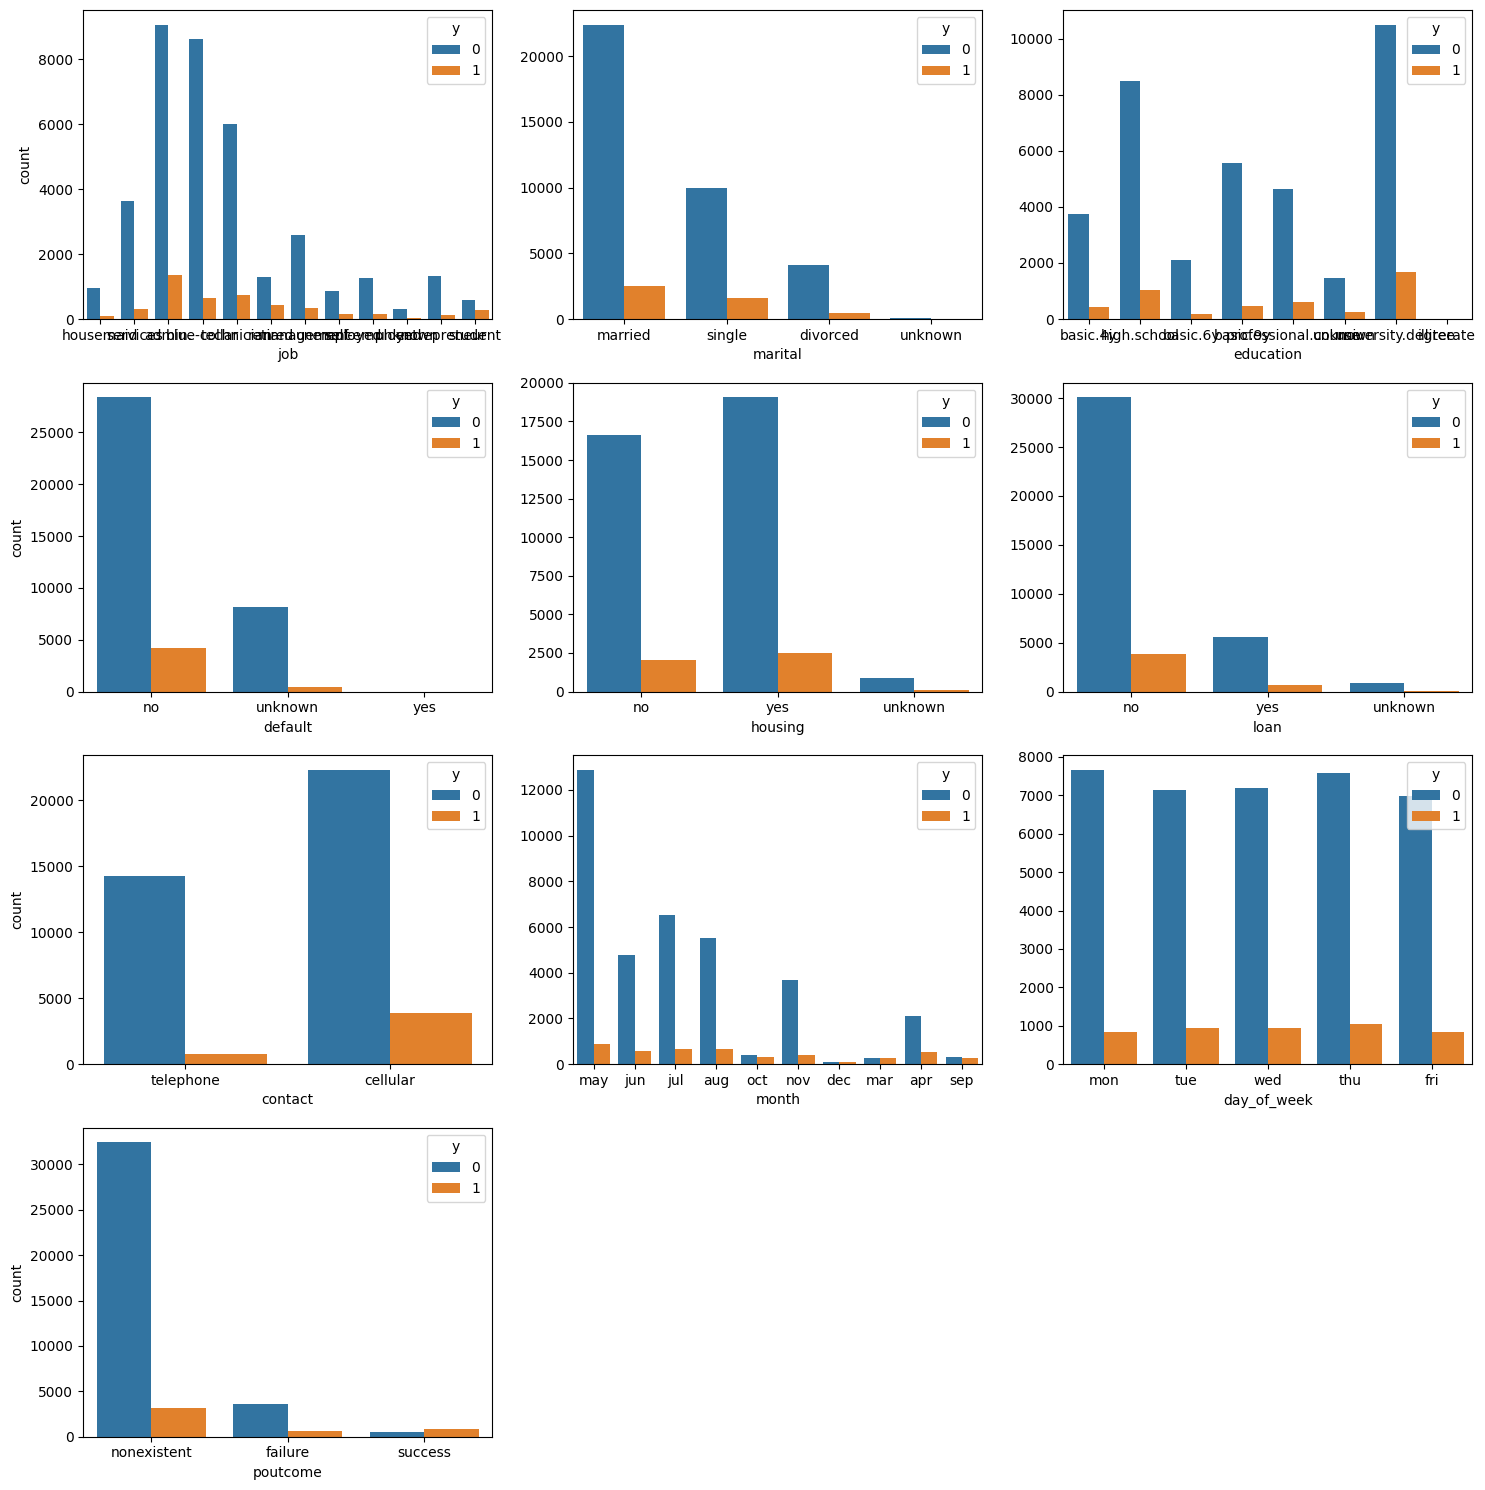

In [11]:
    # Categórico - categórico 

fig, axis = plt.subplots(4, 3, figsize = (15, 15))

sns.countplot(ax = axis[0, 0], data = df, x = "job", hue = "y")
sns.countplot(ax = axis[0, 1], data = df, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = df, x = "education", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = df, x = "default", hue = "y")
sns.countplot(ax = axis[1, 1], data = df, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = df, x = "loan", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 0], data = df, x = "contact", hue = "y")
sns.countplot(ax = axis[2, 1], data = df, x = "month", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 2], data = df, x = "day_of_week", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[3, 0], data = df, x = "poutcome", hue = "y")



fig.delaxes(axis[3, 1])
fig.delaxes(axis[3, 2])
plt.tight_layout()
plt.show()

In [12]:
# Análisis de Correlaciones

    # Factorización de variables cátegoricas
print(df.columns)

df['job'] = pd.factorize(df['job'])[0]
df['marital'] = pd.factorize(df['marital'])[0]
df['education'] = pd.factorize(df['education'])[0]
df['default'] = pd.factorize(df['default'])[0]
df['housing'] = pd.factorize(df['housing'])[0]
df['loan'] = pd.factorize(df['loan'])[0]
df['contact'] = pd.factorize(df['contact'])[0]
df['month'] = pd.factorize(df['month'])[0]
df['day_of_week'] = pd.factorize(df['day_of_week'])[0]
df['poutcome'] = pd.factorize(df['poutcome'])[0]



Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')


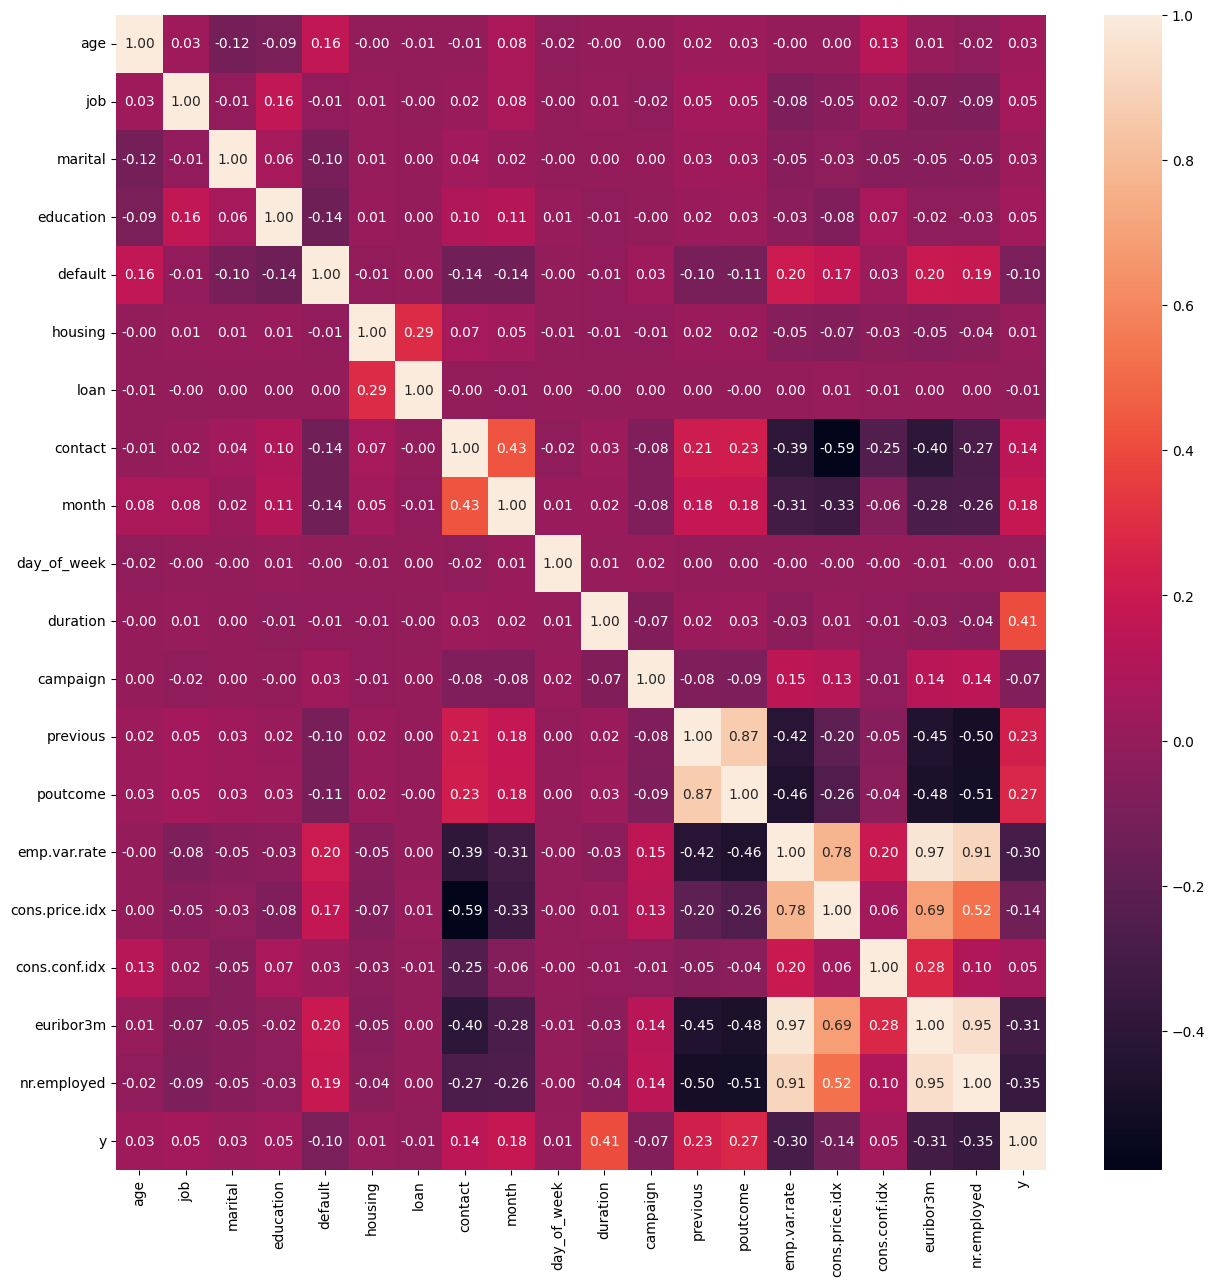

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

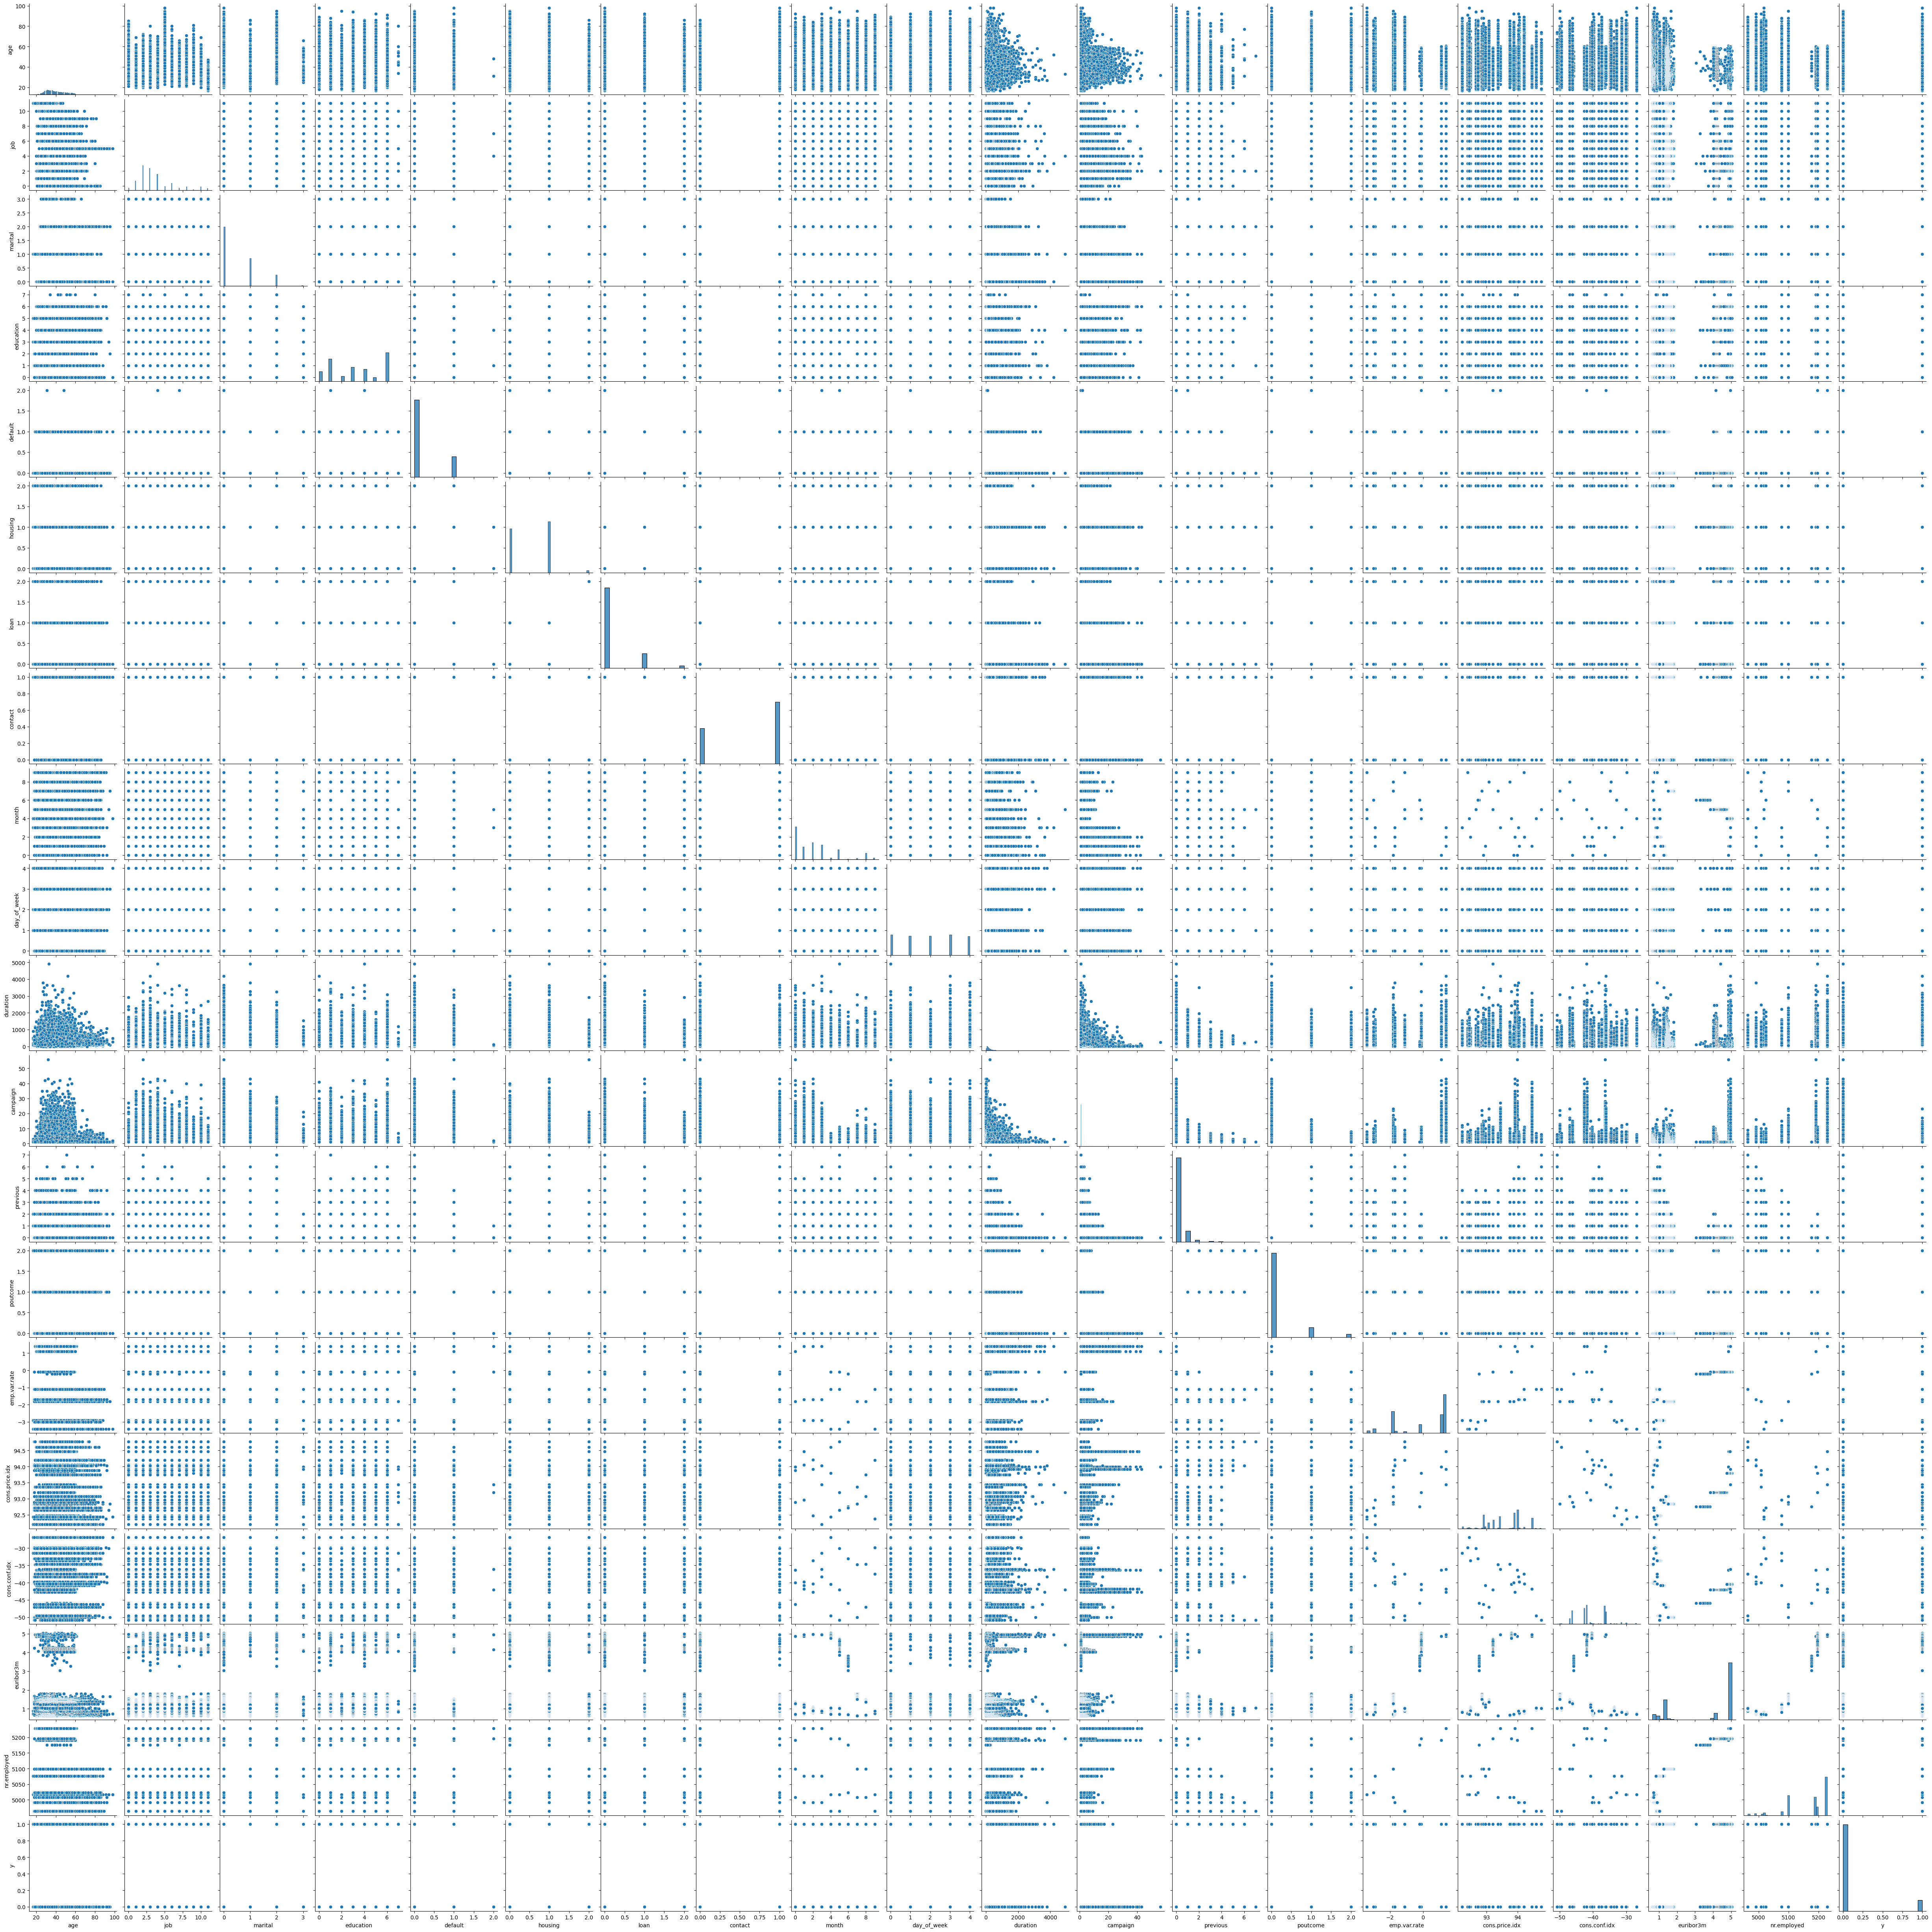

In [14]:
sns.pairplot(data=df)
plt.show()

Análisis de Correlaciones: 


Variables a eliminar tras el análisis:

-day_of_week, nos indica que la probabilidad de contratación es independiente de el día del contacto.

-nr.empleados, me dice que a menor número de empleados mayor la posibilidad de contratación, pero esto no es algo que ayude a la predicción.

-marital, no se correlaciona con ninguna otra variable predictora ni objetivo, la mayoria de los clientes son casados, no obstante el porcentaje de contratación es estable independientemente.

-age, no esta aportando información.

-loan y housing, solo se relacionan entre sí, y no hay relación entre los clientes que tienen un prestámo actualmente y la posibilidad de contratación de plazo fijo.

-job y education, solo se relacionan entre sí, y no demuestran poder ayudar a la predicción de contratación.

-cons.conf.idx, cons.price.idx, emp.var.rate, estan muy relacionadas entre sí, y son indicadores económicos , nos quedaremos con euribor3m en cambio.

-previous, month, contact , nos podrían ayudar a predecir los mejores momentos para hacer las campañas, pero no necesariamente a ubicar al cliente objetivo.



In [15]:
# Eliminación de variables tras Análisis

df = df[[
 'default',
 'duration',
 'campaign',
 'poutcome',
 'euribor3m',
 'y']]

In [16]:
# Ingeniería de características
    #Análisis de outliers

df.describe()

,default,duration,campaign,poutcome,euribor3m,y
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,0.208908,258.315815,2.567879,0.169953,3.621293,0.112663
std,0.406713,259.305321,2.770318,0.455811,1.734437,0.316184
min,0.000000,0.000000,1.000000,0.000000,0.634000,0.000000
25%,0.000000,102.000000,1.000000,0.000000,1.344000,0.000000
50%,0.000000,180.000000,2.000000,0.000000,4.857000,0.000000
75%,0.000000,319.000000,3.000000,0.000000,4.961000,0.000000
max,2.000000,4918.000000,56.000000,2.000000,5.045000,1.000000


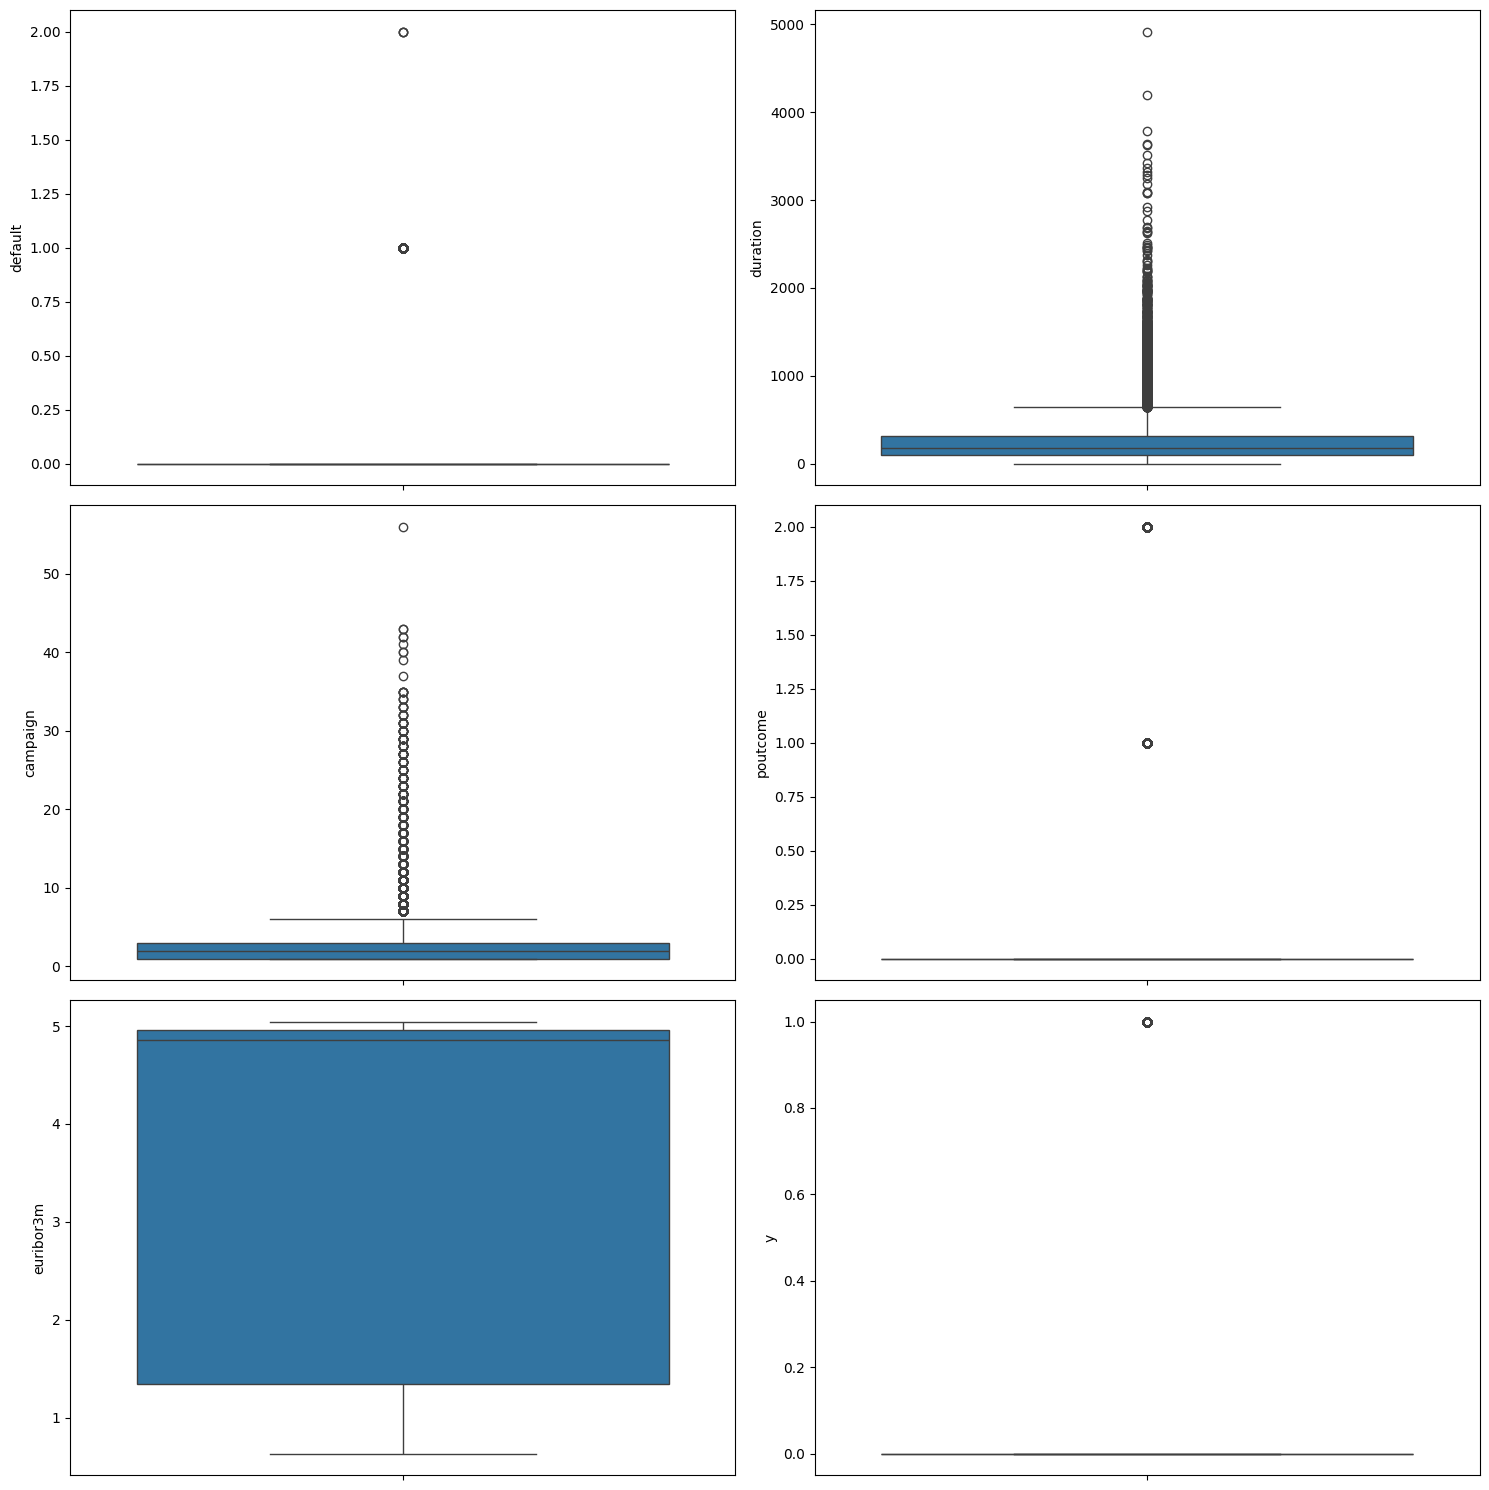

In [17]:
fig, axes =plt.subplots(3,2,figsize=(15,15))

sns.boxplot(ax=axes[0,0],data=df,y='default')
sns.boxplot(ax=axes[0,1],data=df,y='duration')
sns.boxplot(ax=axes[1,0],data=df,y='campaign')
sns.boxplot(ax=axes[1,1],data=df,y='poutcome')
sns.boxplot(ax=axes[2,0],data=df,y='euribor3m')
sns.boxplot(ax=axes[2,1],data=df,y='y')

plt.tight_layout()
plt.show()

In [18]:

def analisis_ric(columna,df):
    estadisticas = df[columna].describe()
    ric = estadisticas['75%'] - estadisticas['25%']
    lim_sup = estadisticas['75%'] + 1.5*ric
    lim_inf = estadisticas['25%'] - 1.5*ric
    print(f'Rango Intercuratílico: {ric}')
    print(f'Límite superior: {lim_sup} \nLímite inferior: {lim_inf}')



In [19]:
analisis_ric('duration',df)

Rango Intercuratílico: 217.0
Límite superior: 644.5 
Límite inferior: -223.5


In [20]:
print(df[df['duration']<=0].count())
print(df[df['duration']>1000].count())

default      4
duration     4
campaign     4
poutcome     4
euribor3m    4
y            4
dtype: int64
default      956
duration     956
campaign     956
poutcome     956
euribor3m    956
y            956
dtype: int64


In [21]:
df = df[df['duration']>0]
df = df[df['duration']<=1000]

In [22]:
analisis_ric('campaign',df)

Rango Intercuratílico: 2.0
Límite superior: 6.0 
Límite inferior: -2.0


In [23]:
print(df[df['campaign']<=0].count())
print(df[df['campaign']>10].count())

default      0
duration     0
campaign     0
poutcome     0
euribor3m    0
y            0
dtype: int64
default      853
duration     853
campaign     853
poutcome     853
euribor3m    853
y            853
dtype: int64


In [24]:
df = df[df['campaign']<=10]

In [25]:
analisis_ric('euribor3m',df)

Rango Intercuratílico: 3.6270000000000002
Límite superior: 10.4015 
Límite inferior: -4.1065000000000005


In [26]:
print(df[df['euribor3m']<=0].count())
print(df[df['euribor3m']>9].count())

default      0
duration     0
campaign     0
poutcome     0
euribor3m    0
y            0
dtype: int64
default      0
duration     0
campaign     0
poutcome     0
euribor3m    0
y            0
dtype: int64


In [27]:
# Análisis de valores faltantes

df.isnull().sum().sort_values(ascending=False)


default      0
duration     0
campaign     0
poutcome     0
euribor3m    0
y            0
dtype: int64

Fin del EDA

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop('y',axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.preprocessing import MinMaxScaler


In [30]:
from sklearn.linear_model import LogisticRegression

eda_model = LogisticRegression()
eda_model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_eda_pred = eda_model.predict(X_test)

from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test,y_eda_pred)
acc_score

0.9084211863330369

In [32]:
from sklearn.model_selection import GridSearchCV

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid = {
    "C": [0.001, 0.0001, 0.1, 1, 0.005, 0.003],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid_search= GridSearchCV(eda_model, grid, scoring = "accuracy", cv = 5)
grid_search

grid_search.fit(X_train,y_train)

best_params_df = pd.DataFrame([grid_search.best_params_])
best_params_df

,C,penalty,solver
0,0.001,None,newton-cg


In [33]:
best_eda_model = grid_search.best_estimator
resultado = accuracy_score(best_eda_model.predict(X_test),y_test)
print(f'Best EDA model: {resultado}')

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator'

CLASE

(Código hecho en clases sin aplicar un EDA real)

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv',sep=";")
df_eda = df[['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'y']]
df_eda

,age,duration,campaign,pdays,emp.var.rate,y
0,56,261,1,999,1.1,no
1,57,149,1,999,1.1,no
2,37,226,1,999,1.1,no
3,40,151,1,999,1.1,no
4,56,307,1,999,1.1,no
...,...,...,...,...,...,...
41183,73,334,1,999,-1.1,yes
41184,46,383,1,999,-1.1,no
41185,56,189,2,999,-1.1,no
41186,44,442,1,999,-1.1,yes


In [34]:
df_eda['y'] = pd.factorize(df['y'])[0]
df_eda

/tmp/ipykernel_44415/4172783826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['y'] = pd.factorize(df['y'])[0]


,age,duration,campaign,pdays,emp.var.rate,y
0,56,261,1,999,1.1,0
1,57,149,1,999,1.1,0
2,37,226,1,999,1.1,0
3,40,151,1,999,1.1,0
4,56,307,1,999,1.1,0
...,...,...,...,...,...,...
41183,73,334,1,999,-1.1,1
41184,46,383,1,999,-1.1,0
41185,56,189,2,999,-1.1,0
41186,44,442,1,999,-1.1,1


In [35]:
X = df_eda.drop('y',axis=1)
y = df_eda['y']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=42,train_size=0.8)

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test,y_pred)
acc_score

0.9045884923525127

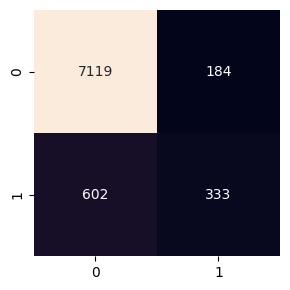

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [41]:
tasa_conversion_anterior = (333+184)/(7119+602+333+184)
tasa_conversion_anterior

0.06275795095897062

In [42]:
tasa_conversion_modelo = 333/(333+184)
tasa_conversion_modelo

0.6441005802707931

Clonclusión de la Clase:

La tasa de conversión de nuestro módelo es 10 veces mejor que la tasa de conversion de la camapaña anterior haciendo menos llamadas, tendremos menos clientes ya que haremos menos llamadas, pero ahorraremos mucho al no tener que invertir muchos más recursos solo para obtener un poco más de clientes.